## Load the iris data

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from numpy.linalg import inv
import pandas as pd

iris = load_iris()
iris['data'][:5,:]

y = np.where(iris['target'] == 2, 1, 0)
X = iris['data']

const = np.ones(shape=y.shape).reshape(-1,1)

mat = np.concatenate( (const, X), axis=1)
mat[:5,:]

array([[1. , 5.1, 3.5, 1.4, 0.2],
       [1. , 4.9, 3. , 1.4, 0.2],
       [1. , 4.7, 3.2, 1.3, 0.2],
       [1. , 4.6, 3.1, 1.5, 0.2],
       [1. , 5. , 3.6, 1.4, 0.2]])

## Recall the algorithm we created for gradient descent for linear regression
Using the following cost function:
$$J(w)=\frac{1}{2}\sum(y^{(i)} - \hat{y}^{(i)})^2$$

In [3]:
import numpy as np

def gradientDescent(x, y, theta, alpha, m, numIterations):
    thetaHistory = list()
    
    xTrans = x.transpose()
    costList = list()
    
    for i in range(0, numIterations):
        # data x feature weights = y_hat
        hypothesis = np.dot(x, theta)
        # how far we are off
        loss = hypothesis - y 
        # mse
        cost = np.sum(loss ** 2) / (2 * m)
        costList.append(cost)

        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m 

        # update
        theta = theta - alpha * gradient
        thetaHistory.append(theta)
        
    return thetaHistory, costList

## For Logistic regression we replace with our likehihood function:

$$
J(w)=\sum{[-y^{(i)}log(\theta(z^{(i)}))-(1-y^{(i)})log(1-\theta(z^{(i)})]}
$$

## And add the sigmoid function to bound $y$ between 0 and 1

In [136]:
def gradientDescent(x, y, alpha, numIterations):
    def mle(y,yhat):
        '''
        This replaces the mean squared error
        '''
        return (-y.dot(np.log(yhat)) - ((1-y)).dot(np.log(1-yhat)))
    
    def sigmoid(z):
        '''
        Transforms values to follow the sigmoid function and bound between 0 and 1
        '''
        return 1./(1. + np.exp(-np.clip(z, -250, 250)))
    
    m = x.shape[0]

    # initialize weights to small random numbers
    theta = np.random.normal(loc=0.0, scale=0.1, size=x.shape[1])
    
    thetaHistory = list()
    
    xTrans = x.transpose()
    costList = list()
    
    for i in range(0, numIterations):
        # data x feature weights = y_hat
        hypothesis = np.dot(x, theta)
        
        # sigmoid transformation
        hypothesis = sigmoid(hypothesis)
        
        # how far we are off
        loss = hypothesis - y 
        
        # mle
        cost = mle(y, hypothesis)
        costList.append(cost)

        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m 

        # update
        theta = theta - alpha * gradient
        thetaHistory.append(theta)
        
    return thetaHistory, costList

## Let's try it out

Completed in 0:00:16.599883


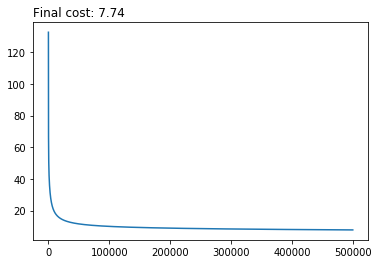

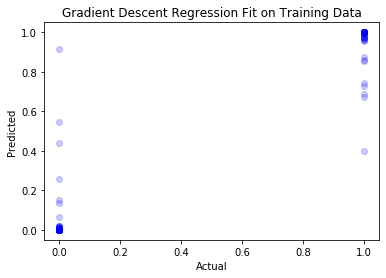

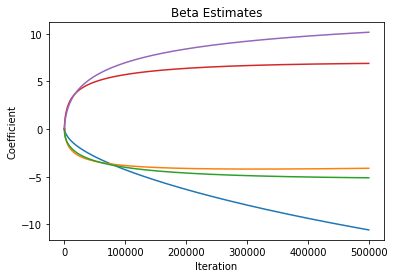

In [137]:
iters = 500000

import datetime

start_ts = datetime.datetime.now()
betaHistory, costList = gradientDescent(mat, y, alpha=0.01, numIterations=iters)
                                                                 
end_ts = datetime.datetime.now()

print(f'Completed in {end_ts-start_ts}')

# cost history
plt.plot(costList)
plt.title(f'Final cost: {costList[-1]:,.2f}', loc='left')
plt.show()

# predict history
gs_betas = betaHistory[iters-1]
gs_predictions = np.dot(mat, gs_betas)
gs_predictions = 1./(1+np.exp(-gs_predictions))

plt.plot(y, gs_predictions, 'bo', alpha=0.2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Descent Regression Fit on Training Data')
plt.show()

from collections import defaultdict
thetas = defaultdict(list)

for i in range(len(betaHistory)):
    for j in range(len(betaHistory[i])):
        thetas[j].append(betaHistory[i][j])
        
thetasD = pd.DataFrame.from_dict(thetas)
thetasD.plot(legend=False)
plt.title('Beta Estimates')
plt.ylabel('Coefficient')
plt.xlabel('Iteration')
plt.show()

- We can see the loss is decreasing over the iterations.  
- Predictions are bounded between 0 and 1 because of the sigmoid function.  
- Weights update after each iteration and will eventually stabilize.